# Locally Weighted Regression(LWR)


---


* Locally weighted linear regression is a non-parametric algorithm, that is, the model does not learn a fixed set of parameters as is done in ordinary linear regression. 
* Rather parameters Theta are computed individually for each query point x. While computing Theta, a higher “preference” is given to the points in the training set lying in the vicinity of x than the points lying far away from x.


---



In [4]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
import seaborn as sn
from scipy.stats.stats import pearsonr

In [5]:
data = sn.load_dataset('tips')

In [ ]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights


def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

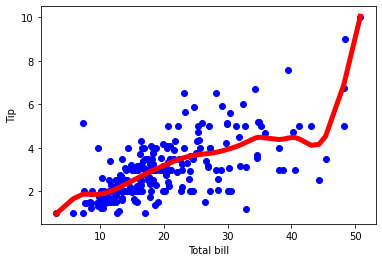

In [ ]:
#load data points

bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip)
# mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m
one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
# print(X)
#set k here
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show(); 

### Using LOWESS(LOcally WEighted regreSSion)

In [30]:
!pip install scikit-lego
import numpy as np
import matplotlib.pylab as plt
from sklego.linear_model import LowessRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [7]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [53]:
X = data.iloc[:,[0]].values
y = data['tip'].values

R2 score:  0.7091565367705791


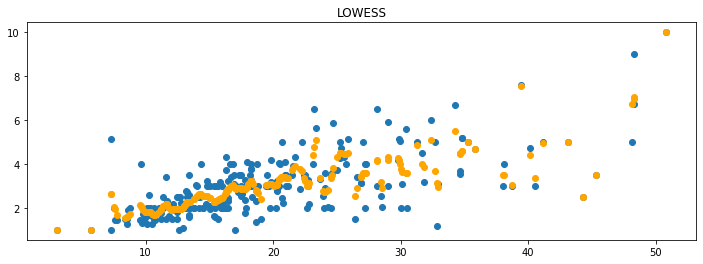

In [51]:
sigma=0.1   #@param {type:"number"}
span=0.9    #@param {type:"number"}

mod = LowessRegression(sigma=sigma, span=span).fit(X, y)
preds = mod.predict(X)

plt.figure(figsize=(12, 4))
plt.scatter(X, y)
plt.scatter(X, preds, color='orange')
plt.title("LOWESS")
print("R2 score: ",  r2_score(y,preds))

In [57]:
import plotly.express as px
fig = px.scatter(data, x='total_bill', y='tip', trendline="lowess", trendline_options=dict(frac=0.05))
fig.show()